In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import os

In [2]:
path ='../IA/input/'

In [3]:
batch_size = 100

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   rotation_range=40, horizontal_flip=True,
                                   fill_mode='nearest')

train_gen = train_datagen.flow_from_directory(path, target_size=(150,150),
                    class_mode='categorical', batch_size=batch_size, 
                                              subset='training')

val_gen = train_datagen.flow_from_directory(path, target_size=(150,150),
                class_mode='categorical', batch_size=batch_size,
                                            subset='validation')

Found 3561 images belonging to 5 classes.
Found 888 images belonging to 5 classes.


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
        
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(5, activation='softmax')     
])

In [5]:
model.load_weights('..\IA\model.h5')

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [9]:
steps, val_steps = train_gen.n/batch_size, val_gen.n/batch_size
num_epochs = 100

In [37]:
history = model.fit(train_gen, validation_data=val_gen, epochs=num_epochs,
                    steps_per_epoch=steps, validation_steps=val_steps)

Epoch 1/100
10/35 [=======>......................] - ETA: 39s - loss: 0.3635 - accuracy: 0.8720

In [10]:
test_loss, test_acc = model.evaluate(val_gen)
print('test accuracy : ', test_acc)

9/9 [==============================] - 5s 472ms/step - loss: 0.7480 - accuracy: 0.7680
test accuracy :  0.7680180072784424


In [11]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [12]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("./model.h5")

# Custom function to load and predict label for the image
def predict(img_rel_path):
    # Import Image from the path with size of (150, 150)
    img = image.load_img(img_rel_path, target_size=(150, 150))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'Mariposa', 1: 'Libelula', 2: 'Saltamontes', 3: 'Mariquita', 4: 'Mosquito'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))
        
    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

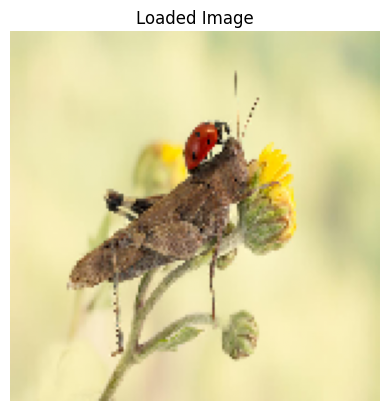

1/1 [==============================] - 0s 27ms/step


Maximum Probability:  0.91158205
Classified: Saltamontes 



-------------------Individual Probability--------------------------------

MARIPOSA : 1.38 %
LIBELULA : 6.09 %
SALTAMONTES : 91.16 %
MARIQUITA : 0.7 %
MOSQUITO : 0.67 %


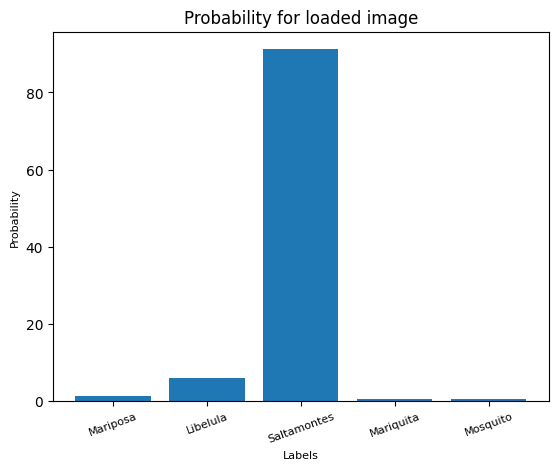

In [15]:
predict("..\IA\pruebas\mariquita-que-se-sienta-en-un-saltamontes-en-un-fondo-verde-claro-61556456.jpg")